In [73]:
'''
next()는 두가지 포맷으로 사용된다.
function 구조로 사용되면 header 만 리턴한다.
consumer 구조로 사용되면 data 에서 header 를 제거한다.

row[날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)] 최고기온은 -1 이다. 
data : [] = list()는 list 타입의 data 를 list()로 초기화 시키는 것이다.
단, 한 메소드 내에서만 사용하면 로컬에서 초기화한다. 예제는 다음과 같다.
data : [] = None
def save_highest_temperature(self):
    data = list()
그러나, 여러 메소드에서 사용하면 필드에서 초기화한다.
data : [] =list()
'''

'\nnext()는 두가지 포맷으로 사용된다.\nfunction 구조로 사용되면 header 만 리턴한다.\nconsumer 구조로 사용되면 data 에서 header 를 제거한다.\n\nrow[날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)] 최고기온은 -1 이다. \ndata : [] = list()는 list 타입의 data 를 list()로 초기화 시키는 것이다.\n단, 한 메소드 내에서만 사용하면 로컬에서 초기화한다. 예제는 다음과 같다.\ndata : [] = None\ndef save_highest_temperature(self):\n    data = list()\n그러나, 여러 메소드에서 사용하면 필드에서 초기화한다.\ndata : [] =list()\n'

In [96]:
import csv
import matplotlib.pyplot as plt
import random

In [97]:
data = csv.reader(open('data/seoul.csv', 'rt', encoding='UTF-8'))

In [98]:
next(data)

['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)']

In [99]:
ls = list(data)

In [114]:
#print([i for i in ls])

In [115]:
#print([i[-1] for i in ls]) # show_highest_temperature

In [102]:
highest_temperature = []
[highest_temperature.append(float(i[-1])) for i in ls if i[-1] != '']
print(f'총 {len(highest_temperature)}개')

총 39463개


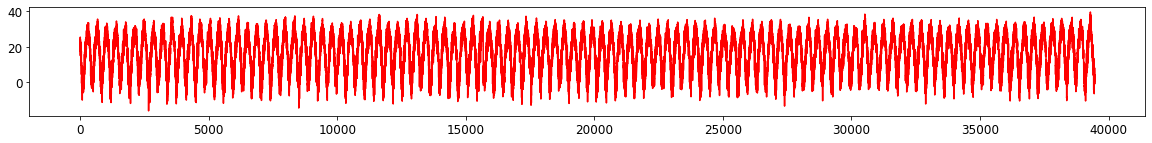

In [103]:
plt.figure(figsize=(20, 2))
plt.plot(highest_temperature, 'r')

In [104]:
high = [] # 최고기온
low = [] # 최저기온

In [105]:
for i in ls:
    if i[-1] != '' and i[-2] != '':
        if 1983 <= int(i[0].split('-')[0]):
            if i[0].split('-')[1] == '02' and i[0].split('-')[2] == '14':
                high.append(float(i[-1]))
                low.append(float(i[-2]))

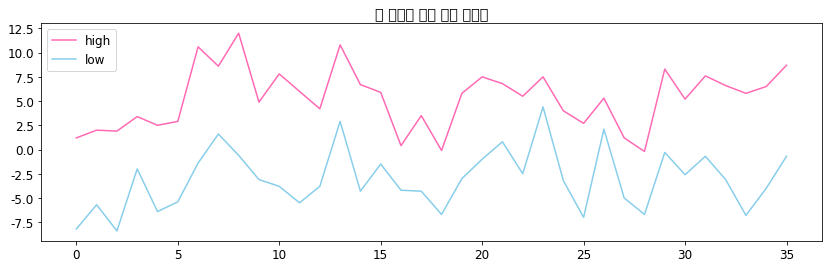

In [106]:
plt.rc('font')
plt.rcParams['axes.unicode_minus'] = False
plt.title('내 생일의 기온 변화 그래프')
plt.plot(high, 'hotpink', label='high')
plt.plot(low, 'skyblue', label='low')
plt.legend()

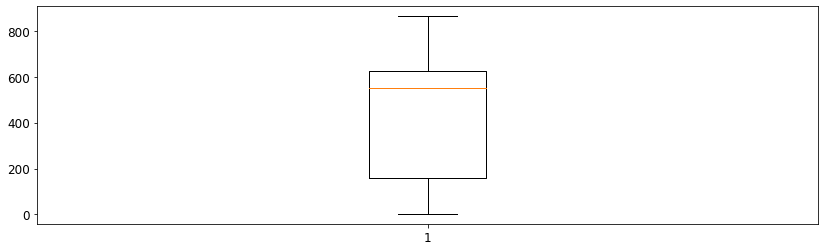

In [107]:
arr = []
[arr.append(random.randint(1, 1000))for i in range(13)]
plt.boxplot(arr)
plt.show()

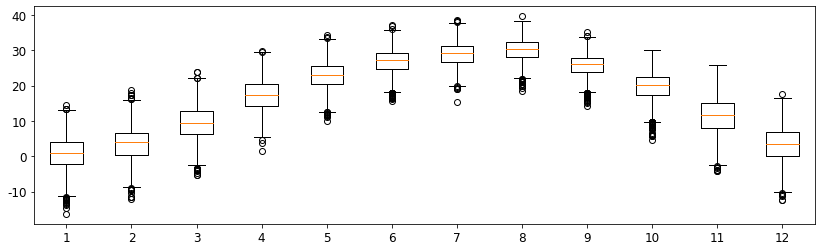

In [110]:
month = [[], [], [], [], [], [], [], [], [], [], [], []]
[month[int(i[0].split('-')[1]) - 1].append(float(i[-1])) for i in ls if i[-1] != '']
plt.boxplot(month)
plt.show()

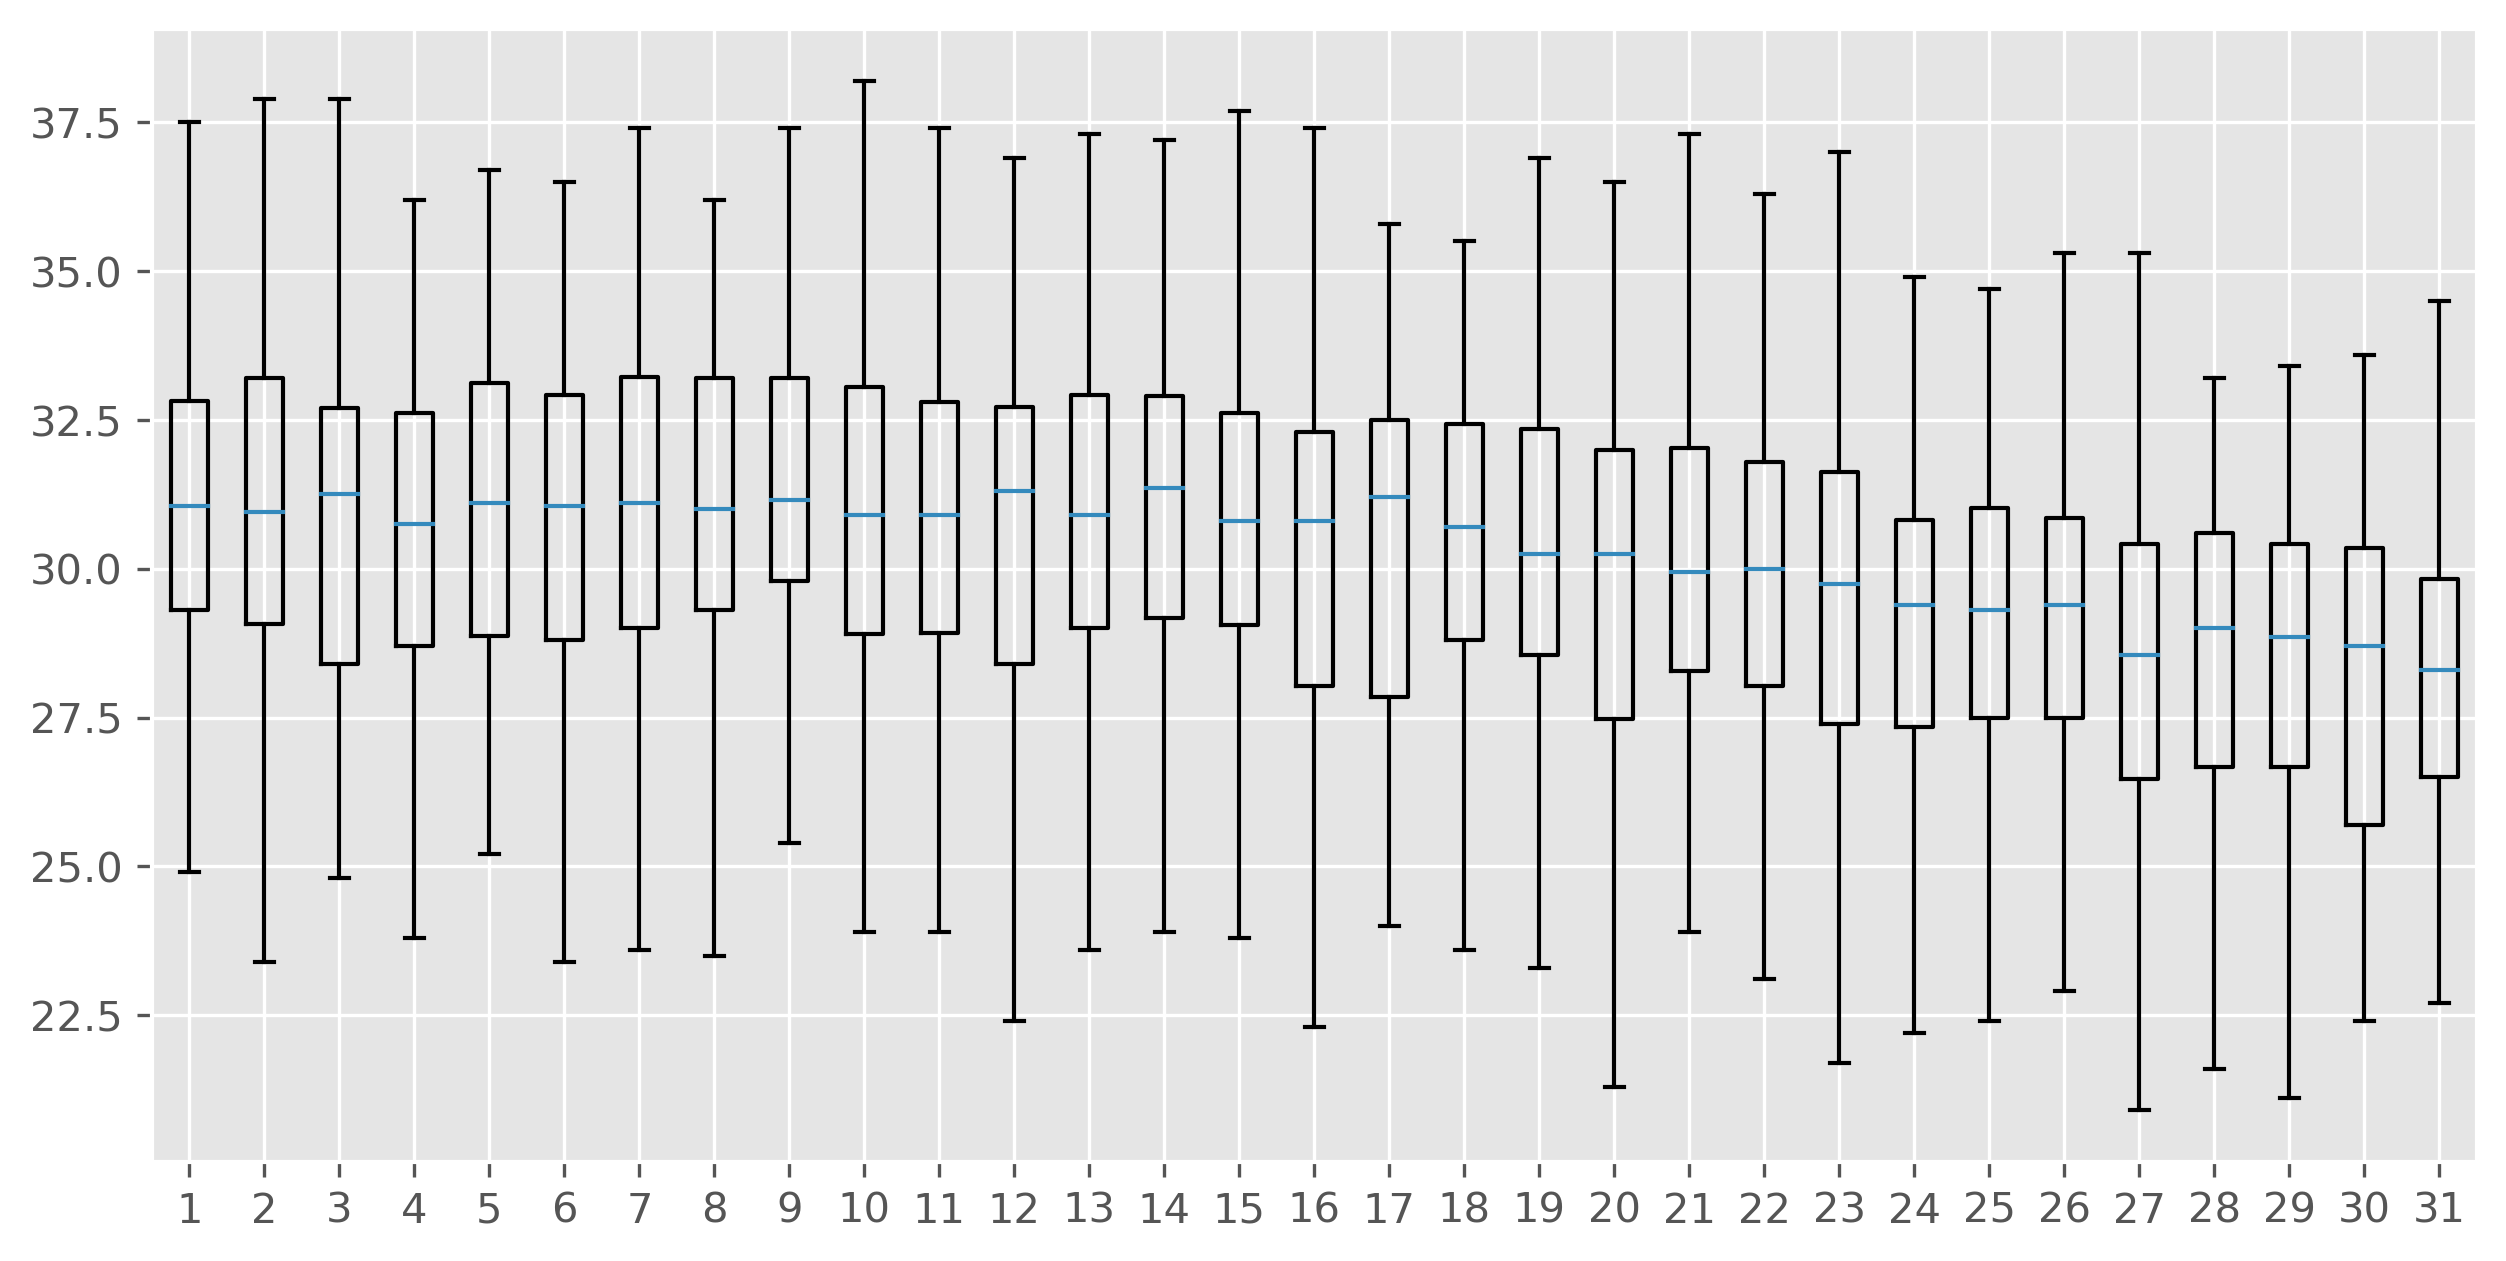

In [113]:
day = []
[day.append([]) for i in range(31)]
[day[int(i[0].split('-')[2]) -1].append(float(i[-1]))
     for i in ls
        if i[-1] != ''
            if i[0].split('-')[1] == '08']
plt.style.use('ggplot') # Graph Style
plt.figure(figsize=(10, 5), dpi=300) # Graph Size
plt.boxplot(day, showfliers=False) # Omit Outlier
plt.show()